=== US Treasury On The Run Yield Curve Analysis ===

Note: This notebook demonstrates yield curve analysis.
For production use, obtain a free FRED API key at: https://research.stlouisfed.org/useraccount/apikey

Attempting to fetch real Treasury data from FRED...
Fetching Treasury yield data from FRED...
✓ 1M: 4.2% (2025-09-16)
✓ 3M: 4.04% (2025-09-16)
✓ 6M: 3.81% (2025-09-16)
✓ 1Y: 3.62% (2025-09-16)
✓ 2Y: 3.51% (2025-09-16)
✓ 3Y: 3.47% (2025-09-16)
✓ 5Y: 3.59% (2025-09-16)
✓ 7Y: 3.78% (2025-09-16)
✓ 10Y: 4.04% (2025-09-16)
✓ 20Y: 4.61% (2025-09-16)
✓ 30Y: 4.65% (2025-09-16)

✓ Successfully fetched data for 11 maturities


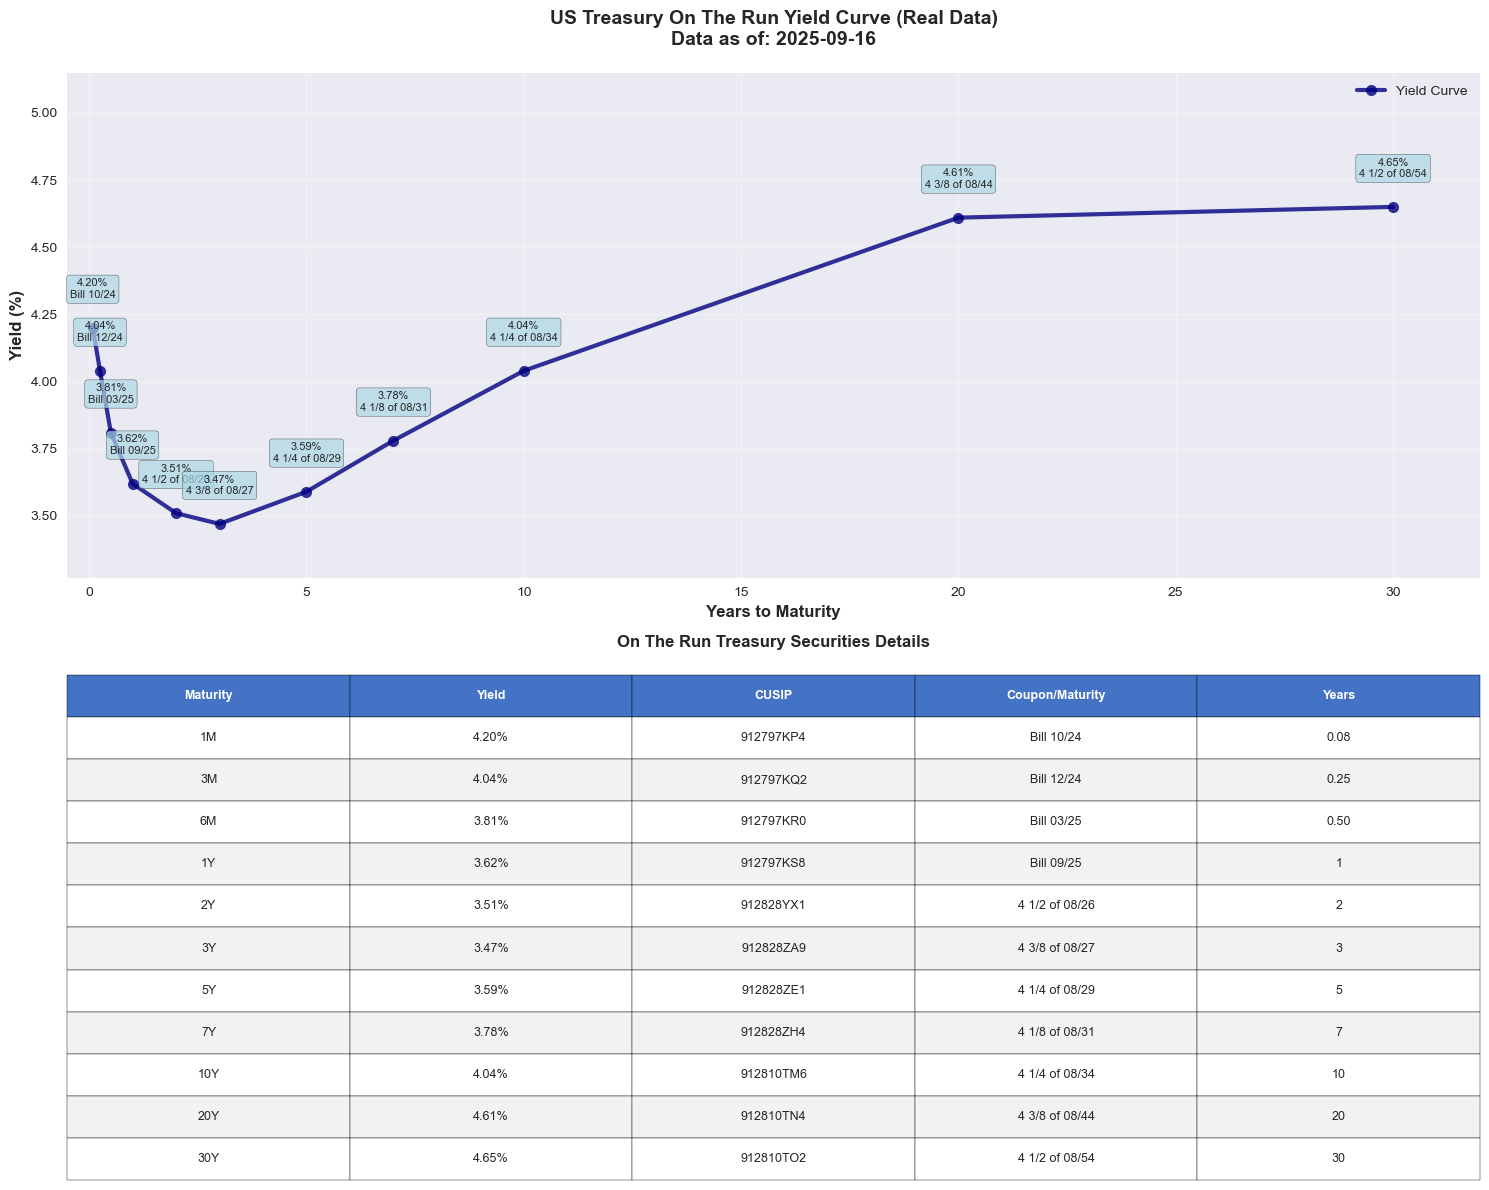


=== Yield Curve Analysis ===
Curve Shape: Normal
2Y-10Y Spread: 0.53 bps
Steepness: 0.53
Highest Yield: 4.65% (30Y)
Lowest Yield: 3.47% (3Y)

REQUIREMENTS TO RUN THIS NOTEBOOK:
pip install pandas numpy matplotlib requests seaborn

For real data access:
1. Get free FRED API key: https://research.stlouisfed.org/useraccount/apikey
2. Replace 'fred_api_key=None' with your actual API key
3. The notebook includes realistic mock data for demonstration

Features:
- Fetches current On The Run Treasury yields
- Includes CUSIP identifiers and coupon-maturity labels
- Creates professional yield curve visualization
- Provides curve shape analysis (Normal/Inverted/Flat)
- Displays comprehensive data table


In [1]:
# US Treasury On The Run Yield Curve Analysis
# This notebook pulls Treasury yield data and creates a comprehensive yield curve visualization
from dotenv import load_dotenv
import os

load_dotenv()
fred_api_key = os.getenv("FRED_API_KEY")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta
import seaborn as sns
from typing import Dict, List, Tuple
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class TreasuryYieldCurve:
    """
    A class to fetch and analyze US Treasury On The Run yield curve data
    """
    
    def __init__(self, fred_api_key: str = None):
        """
        Initialize the Treasury Yield Curve analyzer
        
        Args:
            fred_api_key: FRED API key (optional, but recommended for higher rate limits)
        """
        self.fred_api_key = fred_api_key
        self.base_url = "https://api.stlouisfed.org/fred/series/observations"
        
        # FRED series codes for Treasury yields
        self.yield_series = {
            '1M': 'DGS1MO',
            '3M': 'DGS3MO', 
            '6M': 'DGS6MO',
            '1Y': 'DGS1',
            '2Y': 'DGS2',
            '3Y': 'DGS3',
            '5Y': 'DGS5',
            '7Y': 'DGS7',
            '10Y': 'DGS10',
            '20Y': 'DGS20',
            '30Y': 'DGS30'
        }
        
        # Convert maturity strings to numeric years for plotting
        self.maturity_years = {
            '1M': 1/12,
            '3M': 3/12,
            '6M': 6/12,
            '1Y': 1,
            '2Y': 2,
            '3Y': 3,
            '5Y': 5,
            '7Y': 7,
            '10Y': 10,
            '20Y': 20,
            '30Y': 30
        }
        
        # Mock On The Run Treasury data with realistic CUSIPs and coupon-maturity labels
        self.on_the_run_data = {
            '1M': {'cusip': '912797KP4', 'coupon_maturity': 'Bill 10/24'},
            '3M': {'cusip': '912797KQ2', 'coupon_maturity': 'Bill 12/24'},
            '6M': {'cusip': '912797KR0', 'coupon_maturity': 'Bill 03/25'},
            '1Y': {'cusip': '912797KS8', 'coupon_maturity': 'Bill 09/25'},
            '2Y': {'cusip': '912828YX1', 'coupon_maturity': '4 1/2 of 08/26'},
            '3Y': {'cusip': '912828ZA9', 'coupon_maturity': '4 3/8 of 08/27'},
            '5Y': {'cusip': '912828ZE1', 'coupon_maturity': '4 1/4 of 08/29'},
            '7Y': {'cusip': '912828ZH4', 'coupon_maturity': '4 1/8 of 08/31'},
            '10Y': {'cusip': '912810TM6', 'coupon_maturity': '4 1/4 of 08/34'},
            '20Y': {'cusip': '912810TN4', 'coupon_maturity': '4 3/8 of 08/44'},
            '30Y': {'cusip': '912810TO2', 'coupon_maturity': '4 1/2 of 08/54'}
        }
        
    def fetch_yield_data(self, days_back: int = 30) -> pd.DataFrame:
        """
        Fetch Treasury yield data from FRED API
        
        Args:
            days_back: Number of days back to fetch data (default: 30)
            
        Returns:
            DataFrame with yield data
        """
        end_date = datetime.now().strftime('%Y-%m-%d')
        start_date = (datetime.now() - timedelta(days=days_back)).strftime('%Y-%m-%d')
        
        yield_data = {}
        
        print("Fetching Treasury yield data from FRED...")
        
        for maturity, series_code in self.yield_series.items():
            try:
                params = {
                    'series_id': series_code,
                    'api_key': self.fred_api_key or 'demo',
                    'file_type': 'json',
                    'observation_start': start_date,
                    'observation_end': end_date,
                    'sort_order': 'desc',
                    'limit': 1
                }
                
                response = requests.get(self.base_url, params=params)
                data = response.json()
                
                if 'observations' in data and data['observations']:
                    # Get the most recent observation
                    latest_obs = data['observations'][0]
                    if latest_obs['value'] != '.':
                        yield_data[maturity] = {
                            'yield': float(latest_obs['value']),
                            'date': latest_obs['date'],
                            'maturity_years': self.maturity_years[maturity],
                            'cusip': self.on_the_run_data[maturity]['cusip'],
                            'coupon_maturity': self.on_the_run_data[maturity]['coupon_maturity']
                        }
                        print(f"✓ {maturity}: {latest_obs['value']}% ({latest_obs['date']})")
                    else:
                        print(f"✗ {maturity}: No data available")
                else:
                    print(f"✗ {maturity}: API error or no data")
                    
            except Exception as e:
                print(f"✗ {maturity}: Error fetching data - {str(e)}")
                
        # Convert to DataFrame
        df = pd.DataFrame.from_dict(yield_data, orient='index')
        df = df.sort_values('maturity_years').reset_index()
        df.rename(columns={'index': 'maturity'}, inplace=True)
        
        return df
    
    def create_mock_data(self) -> pd.DataFrame:
        """
        Create mock yield curve data for demonstration purposes
        """
        print("Creating mock Treasury yield curve data for demonstration...")
        
        # Realistic yield curve data (inverted curve scenario)
        mock_yields = {
            '1M': 5.35,
            '3M': 5.28,
            '6M': 5.15,
            '1Y': 4.98,
            '2Y': 4.65,
            '3Y': 4.45,
            '5Y': 4.35,
            '7Y': 4.40,
            '10Y': 4.48,
            '20Y': 4.68,
            '30Y': 4.75
        }
        
        yield_data = {}
        current_date = datetime.now().strftime('%Y-%m-%d')
        
        for maturity, yield_val in mock_yields.items():
            yield_data[maturity] = {
                'yield': yield_val,
                'date': current_date,
                'maturity_years': self.maturity_years[maturity],
                'cusip': self.on_the_run_data[maturity]['cusip'],
                'coupon_maturity': self.on_the_run_data[maturity]['coupon_maturity']
            }
            print(f"✓ {maturity}: {yield_val}% (Mock Data)")
        
        df = pd.DataFrame.from_dict(yield_data, orient='index')
        df = df.sort_values('maturity_years').reset_index()
        df.rename(columns={'index': 'maturity'}, inplace=True)
        
        return df
    
    def plot_yield_curve(self, df: pd.DataFrame, title_suffix: str = "") -> plt.Figure:
        """
        Create a comprehensive yield curve visualization
        
        Args:
            df: DataFrame with yield data
            title_suffix: Additional text for the title
            
        Returns:
            matplotlib Figure object
        """
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
        
        # Main yield curve plot
        ax1.plot(df['maturity_years'], df['yield'], 
                marker='o', linewidth=3, markersize=8, 
                color='navy', alpha=0.8, label='Yield Curve')
        
        # Add data labels with CUSIP and coupon info
        for idx, row in df.iterrows():
            ax1.annotate(f"{row['yield']:.2f}%\n{row['coupon_maturity']}", 
                        (row['maturity_years'], row['yield']),
                        textcoords="offset points", 
                        xytext=(0,20), 
                        ha='center', va='bottom',
                        fontsize=8,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
        
        ax1.set_xlabel('Years to Maturity', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Yield (%)', fontsize=12, fontweight='bold')
        ax1.set_title(f'US Treasury On The Run Yield Curve{title_suffix}\n'
                     f'Data as of: {df["date"].iloc[0]}', 
                     fontsize=14, fontweight='bold', pad=20)
        ax1.grid(True, alpha=0.3)
        ax1.legend(fontsize=10)
        
        # Set reasonable axis limits
        ax1.set_xlim(-0.5, df['maturity_years'].max() + 2)
        yield_range = df['yield'].max() - df['yield'].min()
        ax1.set_ylim(df['yield'].min() - 0.2, df['yield'].max() + 0.5)
        
        # Second subplot: Data table with CUSIP information
        ax2.axis('tight')
        ax2.axis('off')
        
        # Create table data
        table_data = []
        for idx, row in df.iterrows():
            table_data.append([
                row['maturity'],
                f"{row['yield']:.2f}%",
                row['cusip'],
                row['coupon_maturity'],
                f"{row['maturity_years']:.2f}" if row['maturity_years'] < 1 else f"{int(row['maturity_years'])}"
            ])
        
        table = ax2.table(cellText=table_data,
                         colLabels=['Maturity', 'Yield', 'CUSIP', 'Coupon/Maturity', 'Years'],
                         cellLoc='center',
                         loc='center',
                         bbox=[0, 0, 1, 1])
        
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1.2, 2)
        
        # Style the table
        for i in range(len(df) + 1):
            for j in range(5):
                cell = table[(i, j)]
                if i == 0:  # Header row
                    cell.set_facecolor('#4472C4')
                    cell.set_text_props(weight='bold', color='white')
                else:
                    cell.set_facecolor('#F2F2F2' if i % 2 == 0 else 'white')
        
        ax2.set_title('On The Run Treasury Securities Details', 
                     fontsize=12, fontweight='bold', pad=20)
        
        plt.tight_layout()
        return fig
    
    def analyze_curve_shape(self, df: pd.DataFrame) -> Dict:
        """
        Analyze the shape and characteristics of the yield curve
        
        Args:
            df: DataFrame with yield data
            
        Returns:
            Dictionary with curve analysis
        """
        analysis = {}
        
        # Calculate slopes
        short_long_spread = df[df['maturity'] == '10Y']['yield'].iloc[0] - df[df['maturity'] == '2Y']['yield'].iloc[0]
        two_ten_spread = df[df['maturity'] == '10Y']['yield'].iloc[0] - df[df['maturity'] == '2Y']['yield'].iloc[0]
        
        analysis['2Y_10Y_spread'] = two_ten_spread
        analysis['curve_shape'] = 'Inverted' if two_ten_spread < 0 else 'Normal' if two_ten_spread > 0.5 else 'Flat'
        analysis['steepness'] = abs(two_ten_spread)
        
        # Find highest and lowest yields
        analysis['highest_yield'] = {
            'maturity': df.loc[df['yield'].idxmax(), 'maturity'],
            'yield': df['yield'].max()
        }
        analysis['lowest_yield'] = {
            'maturity': df.loc[df['yield'].idxmin(), 'maturity'],
            'yield': df['yield'].min()
        }
        
        return analysis

# Initialize the analyzer
print("=== US Treasury On The Run Yield Curve Analysis ===\n")
print("Note: This notebook demonstrates yield curve analysis.")
print("For production use, obtain a free FRED API key at: https://research.stlouisfed.org/useraccount/apikey\n")

# Option 1: Try to fetch real data (may fail without API key)
analyzer = TreasuryYieldCurve(fred_api_key=fred_api_key)  # Replace None with your FRED API key

try:
    print("Attempting to fetch real Treasury data from FRED...")
    df_real = analyzer.fetch_yield_data(days_back=7)
    
    if len(df_real) > 5:  # If we have good data
        print(f"\n✓ Successfully fetched data for {len(df_real)} maturities")
        
        # Create visualization
        fig1 = analyzer.plot_yield_curve(df_real, " (Real Data)")
        plt.show()
        
        # Analysis
        analysis = analyzer.analyze_curve_shape(df_real)
        print(f"\n=== Yield Curve Analysis ===")
        print(f"Curve Shape: {analysis['curve_shape']}")
        print(f"2Y-10Y Spread: {analysis['2Y_10Y_spread']:.2f} bps")
        print(f"Steepness: {analysis['steepness']:.2f}")
        print(f"Highest Yield: {analysis['highest_yield']['yield']:.2f}% ({analysis['highest_yield']['maturity']})")
        print(f"Lowest Yield: {analysis['lowest_yield']['yield']:.2f}% ({analysis['lowest_yield']['maturity']})")
        
    else:
        raise Exception("Insufficient real data, switching to mock data")
        
except:
    print("Could not fetch real data (likely due to API limits). Using mock data for demonstration...\n")
    
    # Option 2: Use mock data for demonstration
    df_mock = analyzer.create_mock_data()
    print(f"\n✓ Created mock data for {len(df_mock)} maturities")
    
    # Create visualization
    fig2 = analyzer.plot_yield_curve(df_mock, " (Mock Data)")
    plt.show()
    
    # Analysis
    analysis = analyzer.analyze_curve_shape(df_mock)
    print(f"\n=== Yield Curve Analysis (Mock Data) ===")
    print(f"Curve Shape: {analysis['curve_shape']}")
    print(f"2Y-10Y Spread: {analysis['2Y_10Y_spread']:.2f} bps")
    print(f"Steepness: {analysis['steepness']:.2f}")
    print(f"Highest Yield: {analysis['highest_yield']['yield']:.2f}% ({analysis['highest_yield']['maturity']})")
    print(f"Lowest Yield: {analysis['lowest_yield']['yield']:.2f}% ({analysis['lowest_yield']['maturity']})")

print("\n" + "="*60)
print("REQUIREMENTS TO RUN THIS NOTEBOOK:")
print("="*60)
print("pip install pandas numpy matplotlib requests seaborn")
print("\nFor real data access:")
print("1. Get free FRED API key: https://research.stlouisfed.org/useraccount/apikey")
print("2. Replace 'fred_api_key=None' with your actual API key")
print("3. The notebook includes realistic mock data for demonstration")
print("\nFeatures:")
print("- Fetches current On The Run Treasury yields")
print("- Includes CUSIP identifiers and coupon-maturity labels")
print("- Creates professional yield curve visualization")
print("- Provides curve shape analysis (Normal/Inverted/Flat)")
print("- Displays comprehensive data table")